<a href="https://colab.research.google.com/github/aleailearn/capstone-voice/blob/main/Emergency_calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [65]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [78]:
# path file dataset
file_path = '/content/emergency_calls_dataset_refined_medium_expansion.csv'

# membaca dataset
df = pd.read_csv(file_path, sep='\t')

# Create new 'Text' and 'Label' columns
df['Text'] = ''
df['Label'] = ''

# Iterate over rows and extract 'Text' and 'Label'
for index, row in df.iterrows():
    text_label = row['Text,Label']  # Assuming the column is named 'Text,Label'

    # Check if the text ends with 'High', 'Medium', or 'Low'
    if text_label.endswith('High') or text_label.endswith('Medium') or text_label.endswith('Low'):
        # If it does, split based on the last occurrence of those words
        split_index = max(text_label.rfind('High'), text_label.rfind('Medium'), text_label.rfind('Low'))

        # Extract and remove commas from 'Text'
        text = text_label[:split_index].strip().replace(',', '')
        df.loc[index, 'Text'] = text

        df.loc[index, 'Label'] = text_label[split_index:].strip()
    else:
        # If not, assume the entire text is 'Text' and 'Label' is NaN
        df.loc[index, 'Text'] = text_label.replace(',', '')  # Remove commas here as well
        df.loc[index, 'Label'] = float('nan')

# Drop the original 'Text,Label' column
df = df.drop(columns=['Text,Label'])

# menampilkan dataset
df.head()

,Text,Label
0,Ada kecelakaan besar di jalan tol banyak korba...,High
1,Orang ini pingsan dan tidak bernapas segera ki...,High
2,Ada anak kecil tenggelam dia tidak sadar.,High
3,Kecelakaan sepeda motor dengan luka parah di k...,High
4,Seorang pria terjatuh dari gedung tinggi seger...,High


## Assesing Data

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    800 non-null    object
 1   Label   800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [80]:
# mengecek data hilang
missing_values = df.isnull()
duplicates = df.duplicated()

print(f"Data hilang: \n{missing_values.sum()}")
print(f"Data duplikat: \n{duplicates.sum()}")

Data hilang: 
Text     0
Label    0
dtype: int64
Data duplikat: 
0


In [81]:
df.describe()
df.head()

,Text,Label
0,Ada kecelakaan besar di jalan tol banyak korba...,High
1,Orang ini pingsan dan tidak bernapas segera ki...,High
2,Ada anak kecil tenggelam dia tidak sadar.,High
3,Kecelakaan sepeda motor dengan luka parah di k...,High
4,Seorang pria terjatuh dari gedung tinggi seger...,High


## Cleaning Data

In [83]:
# mengubah ke huruf kecil
df['Text'] = df['Text'].str.lower()

# menghapus karakter special
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# menghapus spasi
df['Text'] = df['Text'].str.strip()

In [84]:
missing_values = df.isnull()
duplicates = df.duplicated()

print(f"Data hilang: \n{missing_values.sum()}")
print(f"Data duplikat: \n{duplicates.sum()}")

Data hilang: 
Text     0
Label    0
dtype: int64
Data duplikat: 
0


In [89]:
total_sentences = df.shape[0]
total_unique_sentences = df['Text'].nunique()

print(f"Jumlah total kalimat: {total_sentences}")
print(f"Jumlah kalimat unik: {total_unique_sentences}")

Jumlah total kalimat: 800
Jumlah kalimat unik: 799


In [90]:
# Menambahkan kolom panjang kalimat dalam bentuk jumlah kata
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Menambahkan kolom panjang kalimat dalam jumlah karakter
df['char_count'] = df['Text'].apply(len)

# Menampilkan deskripsi data
print(df.describe())

       word_count  char_count
count  800.000000  800.000000
mean    11.315000   76.160000
std      1.679077   10.630294
min      6.000000   40.000000
25%     10.000000   70.000000
50%     11.000000   77.000000
75%     12.000000   83.000000
max     18.000000  119.000000


# Exploratory Data Analysis (EDA)

In [96]:
from collections import Counter

# Membuat daftar semua kata dalam dataset
all_words = ' '.join(df['Text']).lower().split()  # Lowercase for case-insensitivity

# Menghitung frekuensi kata
word_freq = Counter(all_words)

# Mengambil 30 kata yang paling sering muncul
common_words = word_freq.most_common(30)

# Memisahkan kata dan frekuensi
words, counts = zip(*common_words)

# Menampilkan hasil
for word, count in common_words:
    print(f"{word}: {count}")

di: 643
setelah: 457
orang: 313
merasa: 300
ini: 298
seorang: 295
ringan: 149
mengalami: 141
tidak: 136
ada: 113
dengan: 101
anak: 97
pria: 97
yang: 96
sedikit: 90
luka: 88
korban: 84
wanita: 84
berat: 76
terlalu: 75
dan: 73
akibat: 72
nyeri: 71
banyak: 68
mengeluhkan: 68
lama: 61
ditemukan: 61
sepanjang: 61
kecil: 57
sakit: 57


In [101]:
# Menentukan batas atas untuk outlier (misalnya, persentil ke-95)
upper_bound = np.percentile(df['char_count'], 95)

# Menampilkan outlier
outliers = df[df['char_count'] > upper_bound]
print(outliers[['Text', 'char_count']])

# Memeriksa dan membersihkan outlier
# ... (Anda perlu memutuskan tindakan yang tepat berdasarkan konteks data) ...

# Opsi untuk menangani outlier:
# Menghapus outlier:
df = df[df['char_count'] <= upper_bound]

# Memangkas outlier:
df.loc[df['char_count'] > upper_bound, 'Text'] = df.loc[df['char_count'] > upper_bound, 'Text'].str[:upper_bound]

                                                  Text  char_count
118  ada seorang wanita yang mengeluhkan mata kerin...          90
278  orang ini merasa nyeri ringan di pergelangan t...          91
282  ada seorang wanita yang mengeluhkan kulit keri...          92
291  ledakan gas di apartemen menyebabkan luka baka...          92
308  seorang wanita mengeluhkan nyeri ringan di per...          91
381  orang ini merasa sedikit nyeri di pergelangan ...          91
419  orang ini mengeluhkan sakit kepala parah setel...          90
433  ada ledakan di fasilitas penyimpanan bahan bak...          92
442  orang ini mengeluhkan sakit kepala parah setel...          90
476  seorang pria merasa sedikit tidak nyaman di ka...          90
480  korban kecelakaan di jalan tol ditemukan denga...          90
485  ada tabrakan kapal nelayan di laut banyak korb...          90
486  seorang anak tersedak mainan kecil tidak menun...          92
487  korban kecelakaan pesawat ditemukan dengan luk...        

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat objek TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transform pada data teks
X = vectorizer.fit_transform(df['Text'])  # Gunakan kolom 'Text' yang telah dipreprocessing

# X sekarang berisi representasi TF-IDF dari data teks Anda
print(X.shape)

(733, 705)


In [104]:
import gensim.downloader as api

# Mengunduh model word embedding yang telah dilatih sebelumnya (misalnya, Word2Vec)
model = api.load('word2vec-google-news-300')  # Ganti dengan model yang diinginkan

# Membuat fungsi untuk mendapatkan rata-rata vektor kata dalam kalimat
def get_sentence_embedding(sentence):
    words = sentence.split()
    vectors = [model[word] for word in words if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Mengembalikan vektor nol jika tidak ada kata yang ditemukan

# Menerapkan fungsi pada kolom 'Text'
df['embeddings'] = df['Text'].apply(get_sentence_embedding)

# X sekarang berisi representasi word embedding dari data teks Anda
X = np.vstack(df['embeddings'].values)
print(X.shape)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
(733, 300)


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)

# Membuat dan melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
from sklearn.metrics import accuracy_score, classification_report

# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi: 0.7551020408163265
              precision    recall  f1-score   support

        High       0.87      0.87      0.87        61
         Low       0.70      0.61      0.65        38
      Medium       0.66      0.73      0.69        48

    accuracy                           0.76       147
   macro avg       0.74      0.73      0.74       147
weighted avg       0.76      0.76      0.75       147



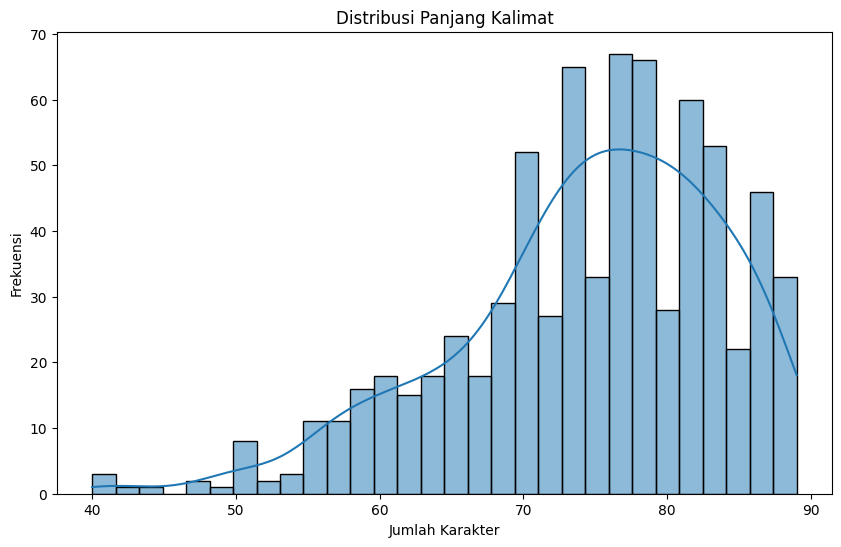

In [107]:
# Menghitung jumlah karakter dalam setiap kalimat
df['char_count'] = df['Text'].apply(len)

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=30, kde=True)
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

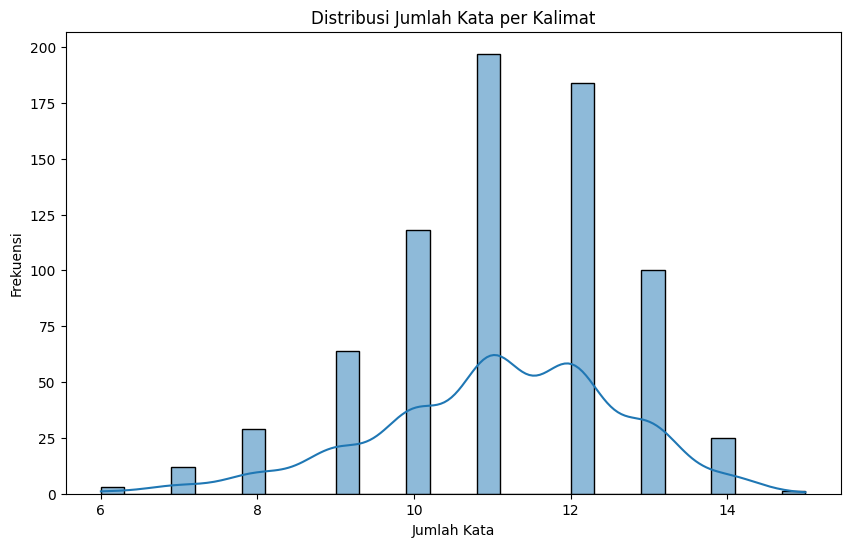

In [108]:
# Menghitung jumlah kata dalam setiap kalimat
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))  # Pisahkan kalimat menjadi kata dan hitung jumlahnya

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Kata per Kalimat')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

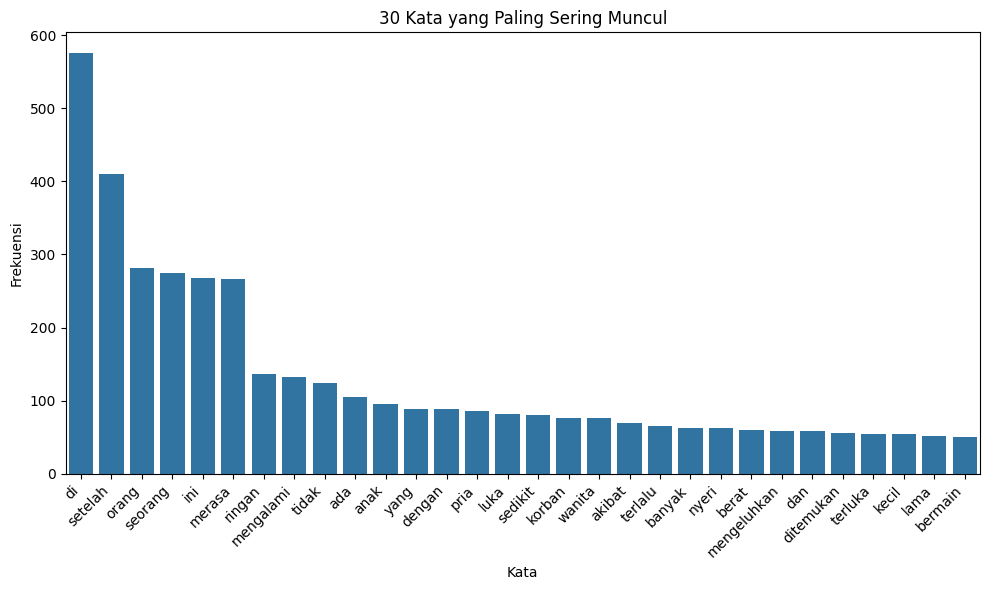

In [109]:
from collections import Counter

# Membuat daftar semua kata dalam dataset
all_words = ' '.join(df['Text']).lower().split()

# Menghitung frekuensi kata
word_freq = Counter(all_words)

# Mengambil 30 kata yang paling sering muncul
common_words = word_freq.most_common(30)

# Memisahkan kata dan frekuensi
words, counts = zip(*common_words)

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=counts)  # Menggunakan words dan counts yang telah didefinisikan
plt.title('30 Kata yang Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x dan perataan
plt.tight_layout()  # Menyesuaikan tata letak agar label tidak terpotong
plt.show()

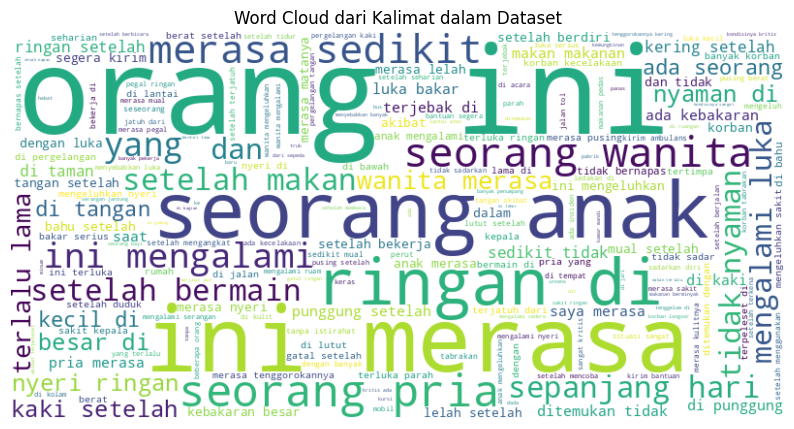

In [111]:
from wordcloud import WordCloud

# Membuat teks gabungan dari semua kalimat dalam dataset
text = ' '.join(df['Text'])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kalimat dalam Dataset')
plt.show()

In [112]:
df.drop(columns=[col for col in df.columns if col not in ['Text', 'Label']], inplace=True)

In [115]:
df.to_csv('/content/emergency_calls_dataset_refined_medium_expansion.csv', index=False)